In [1]:
import numpy
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits import mplot3d
import pandas as pd
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML

In [2]:
np.set_printoptions(precision=2,suppress=True)

In [3]:
def RSS(D,X,Y):
    return np.sum((D-Y@X.T)**2)  

## SVD for Recommender Systems

The movie-user matrix from the slides when the missing values are imputed with the mean rating of 3 is given as:

In [4]:
D = np.array([[5,3,1,1],[2,1,5,3],[2,1,5,3],[4,3,4,2],[5,5,3,1],[3,1,5,3]])
D

array([[5, 3, 1, 1],
       [2, 1, 5, 3],
       [2, 1, 5, 3],
       [4, 3, 4, 2],
       [5, 5, 3, 1],
       [3, 1, 5, 3]])

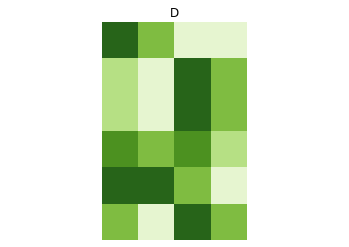

In [5]:
plt.imshow(D,vmin = -5, vmax = 5)
plt.title("D")
plt.set_cmap('PiYG')
plt.axis('equal')
plt.axis('off')
plt.show()

In [6]:
U, s, Vᵀ = np.linalg.svd(D,full_matrices=True)

In [7]:
Y = U[:,0:2]*np.sqrt(s[0:2])
Y

array([[-1.3 ,  1.27],
       [-1.48, -1.01],
       [-1.48, -1.01],
       [-1.73,  0.22],
       [-1.82,  1.26],
       [-1.63, -0.81]])

In [8]:
X = Vᵀ.T[:,0:2]*np.sqrt(s[0:2])
X

array([[-2.22,  1.18],
       [-1.52,  1.33],
       [-2.44, -1.39],
       [-1.35, -0.93]])

The approximation matrix represented by the matrix product is composed by the two outer products (because the factorization rank is two). We visualize here the matrix decomposition by means of colors. The darker the color, the  higher is the absolute value of the corresponding element in the matrix. Positive values are green and negative values are pink.  
The visualization makes the grid structure apparent which is induced by the outer product.

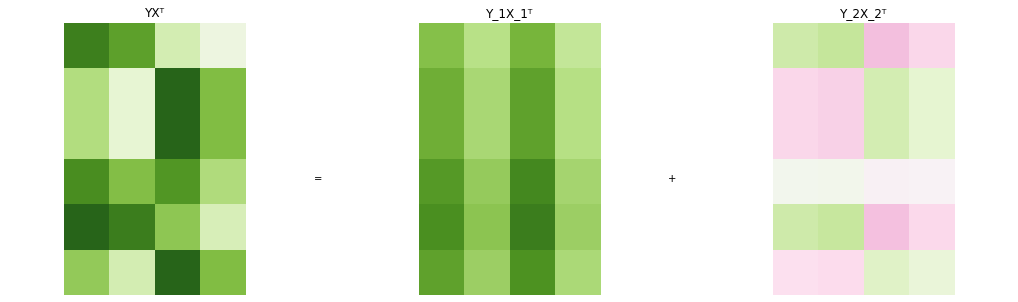

In [9]:
plt.figure(2, figsize=(18, 5))
#--------------
plt.subplot(1,3,1)
plt.imshow(Y@X.T,vmin = -5, vmax = 5)
plt.title("YXᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '=')

plt.subplot(1,3,2)
plt.imshow(np.outer(Y[:,0],X[:,0]),vmin = -5, vmax = 5)
plt.title("Y_1X_1ᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '+')

plt.subplot(1,3,3)
plt.imshow(np.outer(Y[:,1],X[:,1]),vmin = -5, vmax = 5)
plt.title("Y_2X_2ᵀ")
plt.axis('equal')
plt.axis('off')
plt.show()

What happens if we increase the rank?

In [10]:
X = Vᵀ.T[:,0:3]*np.sqrt(s[0:3])
Y = U[:,0:3]*np.sqrt(s[0:3])

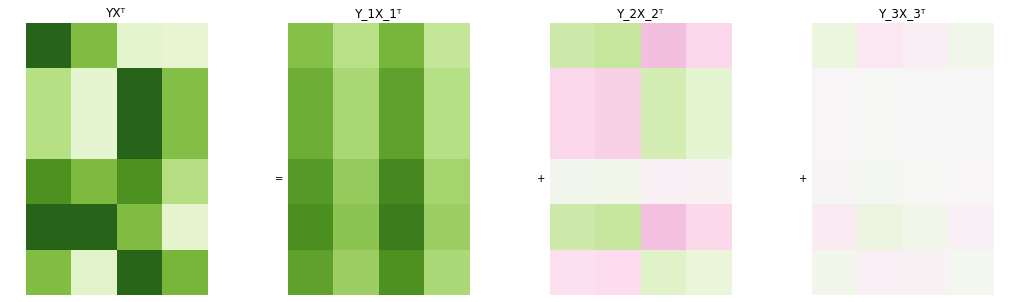

In [11]:
plt.figure(2, figsize=(18, 5))
#--------------
plt.subplot(1,4,1)
plt.imshow(Y@X.T,vmin = -5, vmax = 5)
plt.title("YXᵀ")
plt.set_cmap('PiYG')
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '=')

plt.subplot(1,4,2)
plt.imshow(np.outer(Y[:,0],X[:,0]),vmin = -5, vmax = 5)
plt.title("Y_1X_1ᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '+')

plt.subplot(1,4,3)
plt.imshow(np.outer(Y[:,1],X[:,1]),vmin = -5, vmax = 5)
plt.title("Y_2X_2ᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '+')

plt.subplot(1,4,4)
plt.imshow(np.outer(Y[:,2],X[:,2]),vmin = -5, vmax = 5)
plt.title("Y_3X_3ᵀ")
plt.axis('equal')
plt.axis('off')
plt.show()

The approximating data matrix, visualized by the matrix on the left above, is given as:

In [12]:
np.round(Y@X.T,1)

array([[5. , 3. , 1. , 0.9],
       [2. , 1. , 5. , 2.9],
       [2. , 1. , 5. , 2.9],
       [4. , 3. , 4. , 2.1],
       [5. , 5. , 3. , 1. ],
       [3. , 1.1, 4.9, 3.1]])

Every outer product has a visualization displaying a block-diagonal structure after a suitable reordering of the columns and rows. 

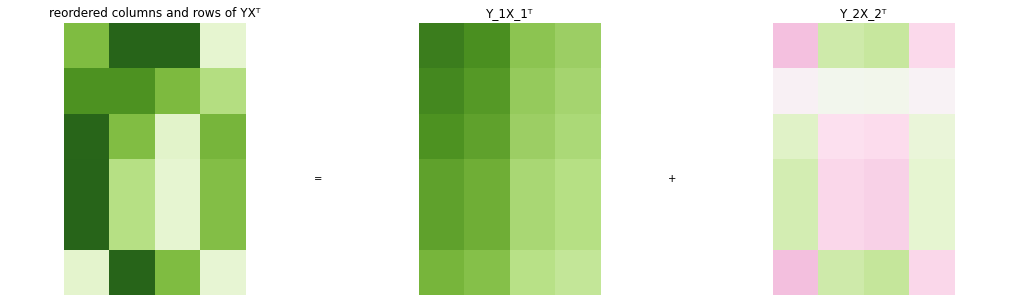

In [13]:
plt.figure(2, figsize=(18, 5))
Y_order = Y[np.argsort(Y[:,0]),]
X_order = X[np.argsort(X[:,0]),]
#--------------
plt.subplot(1,3,1)
plt.imshow(Y_order@X_order.T,vmin = -5, vmax = 5)
plt.title("reordered columns and rows of YXᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '=')

plt.subplot(1,3,2)
plt.imshow(np.outer(Y_order[:,0],X_order[:,0]),vmin = -5, vmax = 5)
plt.title("Y_1X_1ᵀ")
plt.axis('equal')
plt.axis('off')
plt.text(5,3, '+')

plt.subplot(1,3,3)
plt.imshow(np.outer(Y_order[:,1],X_order[:,1]),vmin = -5, vmax = 5)
plt.title("Y_2X_2ᵀ")
plt.axis('equal')
plt.axis('off')
plt.show()


In [14]:
np.outer(Y_order[:,0],X_order[:,0])

array([[4.44, 4.04, 2.76, 2.47],
       [4.21, 3.83, 2.62, 2.34],
       [3.97, 3.61, 2.47, 2.21],
       [3.61, 3.28, 2.25, 2.01],
       [3.61, 3.28, 2.25, 2.01],
       [3.16, 2.87, 1.96, 1.75]])

# PCA: What is the Variance in a Direction?

In [15]:
def pcaPlot():
    plt.axis('equal')
    plt.xlim(-15.0,40.0)
    plt.ylim(-10.0,40.0)
    plt.grid()

We create an example dataset which looks like an ellipse.

In [16]:
mean = [10,20]
cov = [[20,10],[10,10]]
n=500

x1,x2 = np.random.multivariate_normal(mean,cov,n).T
D = np.c_[x1,x2]
dfD = pd.DataFrame(data =D,columns = ["$F_1$","$F_2$"])
dfD.head()

,$F_1$,$F_2$
0,10.128385,19.116290
1,7.673698,16.617524
2,2.809266,13.556559
3,13.250121,21.924079
4,2.370300,18.679987


Plot of the data points.

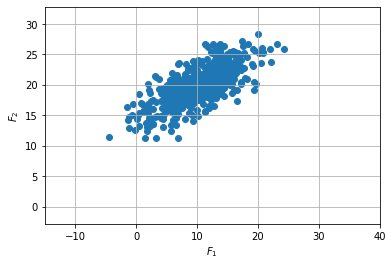

In [17]:
pcaPlot()

plt.scatter(D[:,0],D[:,1])
plt.xlabel("$F_1$")
plt.ylabel("$F_2$")
plt.show()

We choose a vector $\alpha$, creating a new feature $F_a = \alpha_1F_1+\alpha_2F_2$, having observations $D_{\cdot a} = D\alpha$

In [18]:
α = np.array([1,2])
α=α/np.linalg.norm(α)
print("α=",α)
D_a = D@α
dfD_a = pd.DataFrame({"$F_a$":D_a})
dfD_a.head()

α= [0.45 0.89]


,$F_a$
0,21.627682
1,18.294947
2,13.381697
3,25.535127
4,17.767918


We plot the data and the direction onto which $\alpha$ points by the red vector.

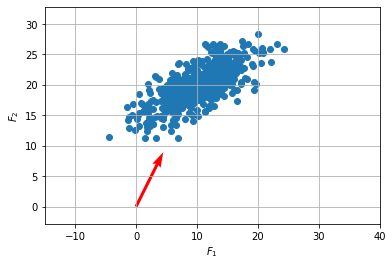

In [19]:
pcaPlot()

plt.scatter(D[:,0],D[:,1])
plt.xlabel("$F_1$")
plt.ylabel("$F_2$")
plt.quiver(0, 0, 10*α[0],10*α[1] , units='xy', width=0.5, scale=1, color='red')
plt.show()

We project the points onto the direction $\alpha$ such that we can plot them them in the original feature space $F_1,F_2$.

In [20]:
P = np.outer(D_a,α)
dfP = pd.DataFrame(data =P,columns = ["$F_1$","$F_2$"])
dfP.head()

,$F_1$,$F_2$
0,9.672193,19.344386
1,8.181749,16.363498
2,5.984477,11.968954
3,11.419656,22.839312
4,7.946055,15.892109


Plot of the points projected onto vector $\alpha$ in purple.

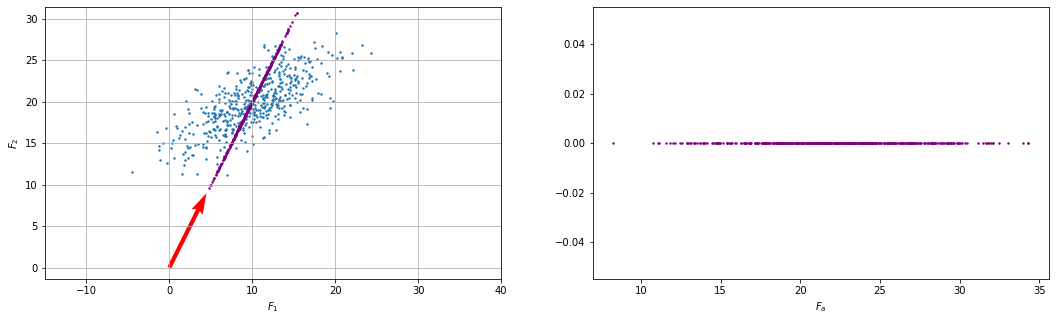

In [21]:
plt.figure(2, figsize=(18, 5))
#--------------
plt.subplot(1,2,1)
pcaPlot()
plt.scatter(D[:,0],D[:,1], s=2)
plt.scatter(P[:,0],P[:,1], color = 'purple', s=2) 
plt.quiver(0, 0, 10*α[0],10*α[1] , units='xy', width=0.5, scale=1, color='red')
plt.xlabel("$F_1$")
plt.ylabel("$F_2$")
#----------------
plt.subplot(1,2,2)
plt.scatter(D_a, np.zeros(D_a.shape[0]), color ="purple", s=2)
plt.xlabel("$F_a$")
plt.show()

In [22]:
R = np.array([[np.cos(0.2/np.pi), -np.sin(0.2/np.pi)],[np.sin(0.2/np.pi), np.cos(0.2/np.pi)]])
R

array([[ 1.  , -0.06],
       [ 0.06,  1.  ]])

In [23]:
def animatePCA(i):
    ax.cla()
    ax.axis('equal')
    ax.grid()
    global α,D,R
    if i>0: α=R@α
    ax.scatter(D[:,0],D[:,1], s=2)
    P = np.outer(D@α,α)
    ax.scatter(P[:,0],P[:,1], color = 'purple', s=2) 
    ax.quiver(0, 0, 10*α[0],10*α[1] , units='xy', width=0.5, scale=1, color='red')
    return

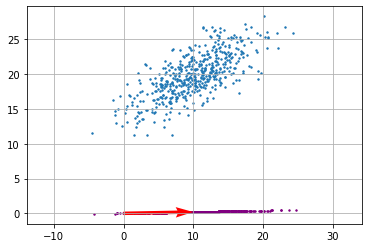

In [24]:
fig = plt.figure()
ax = plt.axes(xlim=(-20, 50), ylim=(-15, 40))
α=np.array([1,0])
anim = animation.FuncAnimation(fig, animatePCA, frames=100, interval=200, blit=False)
HTML(anim.to_jshtml())

The sample variance of the data in the direction of $\alpha$ is given by the variance of the points D_a (plotted in purple above) which are the data points projected onto $\alpha$.

In [25]:
print("σ^2=",np.var(D_a))

σ^2= 20.95833305768798


We have calculated on the slides that the sample variance of the data in the direction of $\alpha$ is given as
$$\sigma^2_\alpha = \frac1n\lVert(D-\mathbf{1}\mu_F^\top)\alpha\rVert^2$$

In [26]:
C = D-np.mean(D,axis =0)
varAlpha = np.sum((C@α)**2)/n
print("||(D-1μᵀ)α||^2/n=", varAlpha)

||(D-1μᵀ)α||^2/n= 22.1140222477228


## The Geometry of PCA

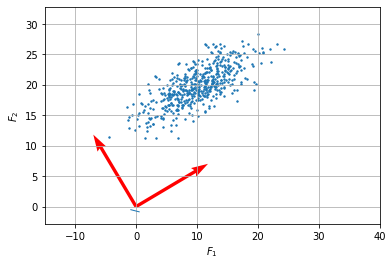

In [27]:
pca = PCA(n_components=2)
pca.fit(D)
pcs = pca.components_.T
pc1, pc2 = pcs

pcaPlot()
plt.scatter(D[:,0],D[:,1], s=2)
plt.plot(pc1, pc2, linewidth=1)
plt.xlabel("$F_1$")
plt.ylabel("$F_2$")
plt.quiver(0, 0, -pc1[0], -pc2[0], color=['red'], width=0.01,  scale=4)
plt.quiver(0, 0, -pc1[1], -pc2[1], color=['red'], width=0.01,  scale=4)

#plt.quiver(0, 0, pc1, pc2, zorder=11, width=0.01, scale=4, color='red')
plt.show()

In [28]:
pcs = pca.components_.T
pcs

array([[-0.86,  0.51],
       [-0.51, -0.86]])

The data transformed onto the first two principal components (cyan) is now aligned with the axes. Note that the projected data has a mean of zero, but that depends on the implementation of PCA.

In [29]:
D_pc = pca.transform(D)
dfD_pc = pd.DataFrame(data =D_pc,columns = ["PC1","PC2"])
dfD_pc.head()

,PC1,PC2
0,0.307800,0.675764
1,3.694641,1.569425
2,9.440161,1.715041
3,-3.810336,-0.142690
4,7.199573,-2.913346


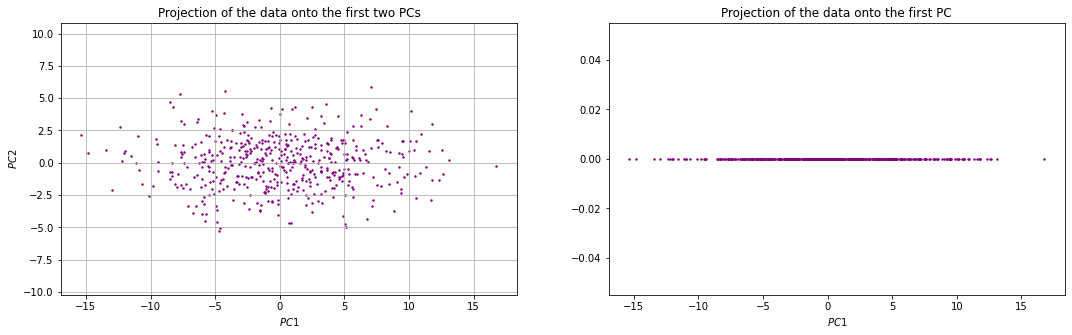

In [30]:
plt.figure(2, figsize=(18, 5))
#--------------
plt.subplot(1,2,1)
plt.title("Projection of the data onto the first two PCs")
plt.scatter(D_pc[:,0],D_pc[:,1], color = 'purple', s=2) 
plt.axis('equal')
plt.grid()
plt.xlabel("$PC1$")
plt.ylabel("$PC2$")
#----------------
plt.subplot(1,2,2)
plt.title("Projection of the data onto the first PC")
plt.scatter(D_pc[:,0], np.zeros(n), color ="purple", s=2)
plt.xlabel("$PC1$")
plt.show()